Welcome to JupyROOT 6.08/05

Confusion matrix

Example of confusion matrix usage to evaluate the quality
of the output of a classifier on the iris data set. The
diagonal elements represent the number of points for which
the predicted label is equal to the true label, while
off-diagonal elements are those that are mislabeled by the
classifier. The higher the diagonal values of the confusion
matrix the better, indicating many correct predictions.

The figures show the confusion matrix with and without
normalization by class support size (number of elements
in each class). This kind of normalization can be
interesting in case of class imbalance to have a more
visual interpretation of which class is being misclassified.

Here the results are not as good as they could be as our
choice for the regularization parameter C was not the best.
In real life applications this parameter is usually chosen
using :ref:`grid_search`.


Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0 

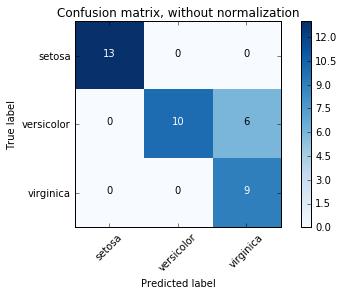

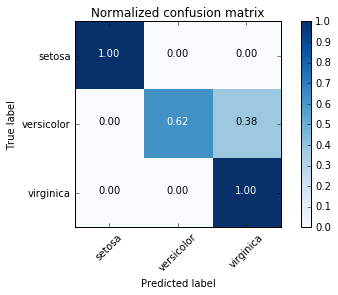

In [1]:
from ROOT import TFile
from root_numpy import tree2array
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing
from plot_confusion_matrix import plot_confusion_matrix
import copy

In [6]:
fileTT_PUPPI = TFile("~/3DayLifetime/out_QCD_all_PUPPI.root", "READ")
fileTT_noPUPPI = TFile("out_QCDall.root", "READ")
treeTT_PUPPI = fileTT_PUPPI.Get("jetTree")
treeTT_noPUPPI = fileTT_noPUPPI.Get("jetTree")

In [7]:
vars = ['SDmass', 'tau32', 'tau21', 'h1_top', 'h2_top', 'h3_top', 'h4_top', 'isotropy_top', 'aplanarity_top', 'sphericity_top', 'thrust_top', 'h1_W', 'h2_W', 'h3_W', 'h4_W', 'isotropy_W', 'aplanarity_W', 'sphericity_W', 'thrust_W', 'h1_Z', 'h2_Z', 'h3_Z', 'h4_Z', 'isotropy_Z', 'aplanarity_Z', 'sphericity_Z', 'thrust_Z', 'h1_H', 'h2_H', 'h3_H', 'h4_H', 'isotropy_H', 'aplanarity_H', 'sphericity_H', 'thrust_H', 'bDisc', 'bDisc1', 'bDisc2', 'sumPz_top', 'sumPz_W', 'sumPz_Z', 'sumPz_H', 'sumP_top', 'sumP_W', 'sumP_Z', 'sumP_H', 'q', 'm12_W', 'm13_W', 'm23_W', 'm1234_W', 'm12_Z', 'm13_Z', 'm23_Z', 'm1234_Z', 'm12_top', 'm13_top', 'm23_top', 'm1234_top', 'm12_H', 'm13_H', 'm23_H', 'm1234_H']

In [8]:
sel = 'et > 500. && tau32 < 9999. && bDisc > -1. && bDisc1 > -1. && bDisc2 > -1.'
arrayTT_PUPPI = tree2array(treeTT_PUPPI, vars, sel)
arrayTT_noPUPPI = tree2array(treeTT_noPUPPI, vars, sel)

In [9]:
newArrayTT_PUPPI = []
newArrayTT_noPUPPI = []
for entry in arrayTT_PUPPI[:]:
    a = list(entry)
    newArrayTT_PUPPI.append(a)
for entry in arrayTT_noPUPPI[:]:
    a = list (entry)
    newArrayTT_noPUPPI.append(a)
arrayTT_PUPPI = copy.copy(newArrayTT_PUPPI)
arrayTT_noPUPPI = copy.copy(newArrayTT_noPUPPI)
    
histsTT_PUPPI = np.array(arrayTT_PUPPI).T
histsTT_noPUPPI = np.array(arrayTT_noPUPPI).T

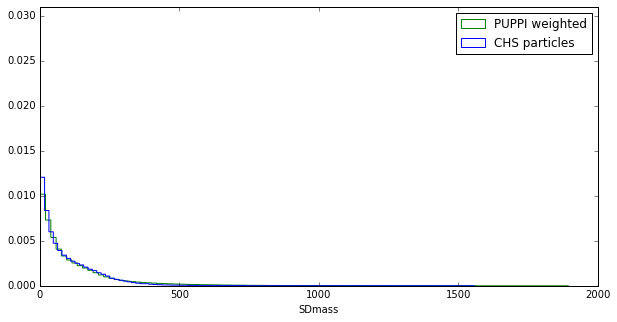

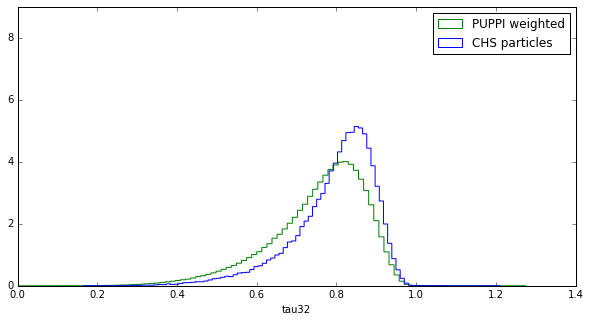

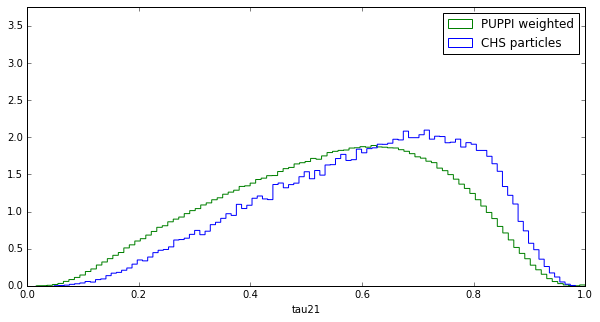

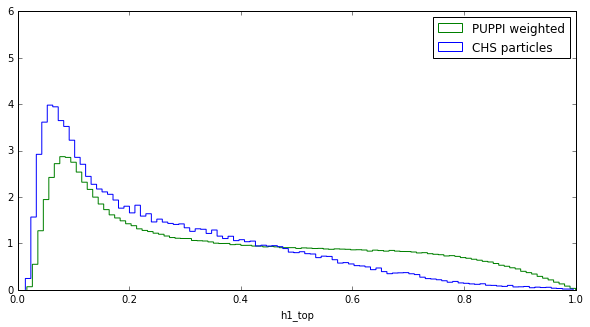

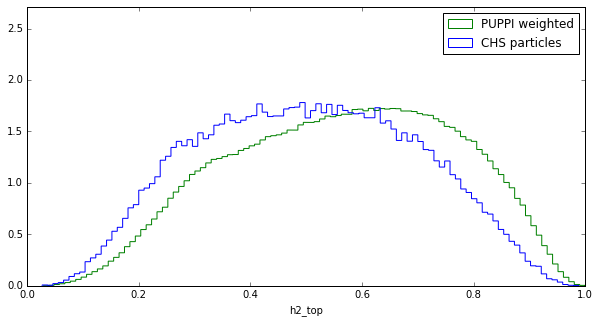

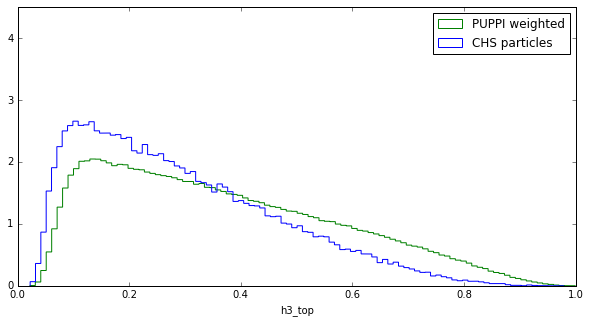

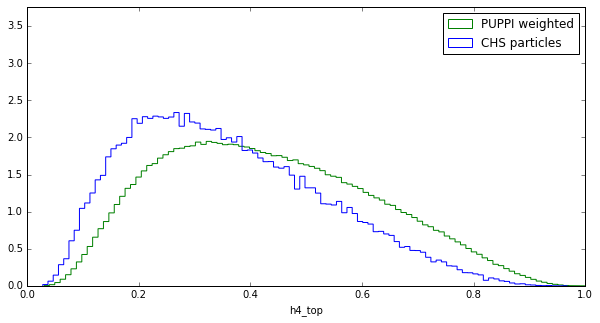

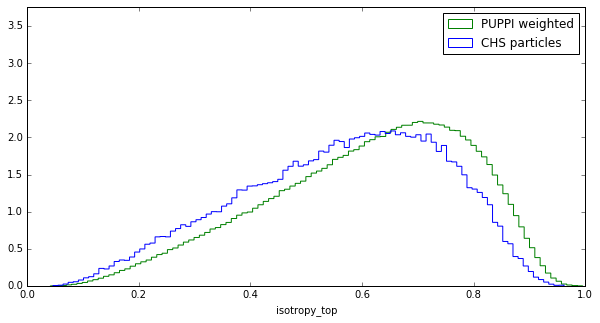

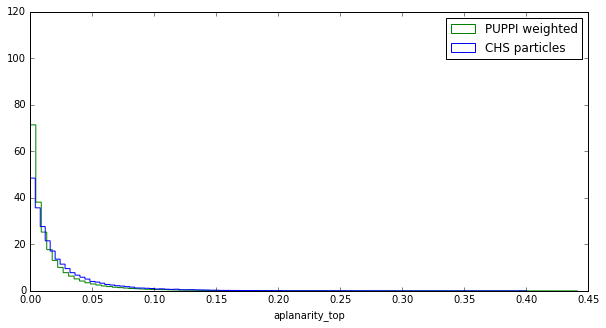

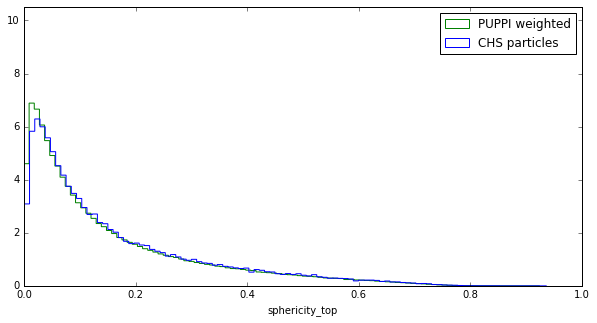

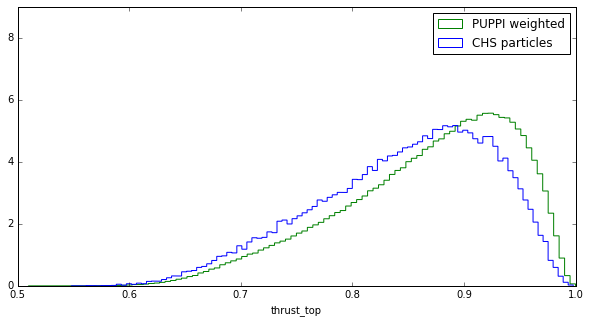

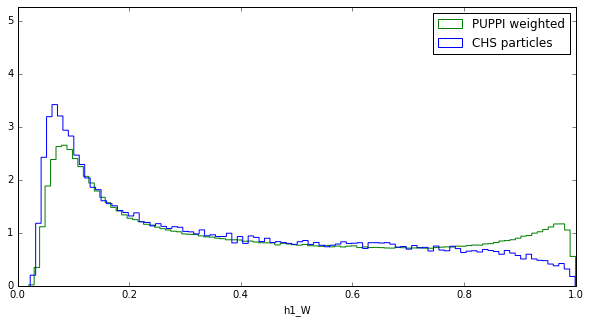

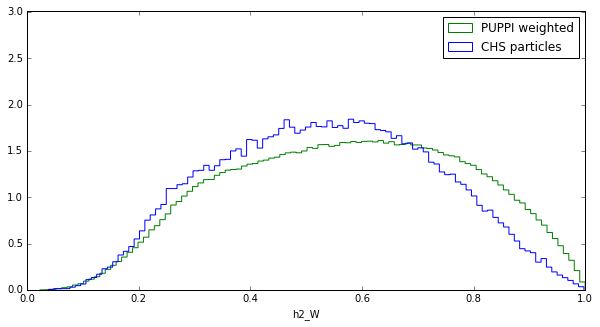

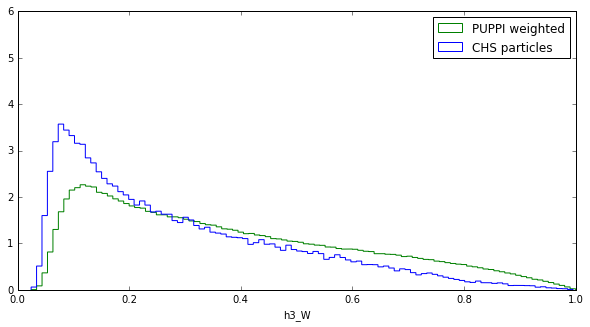

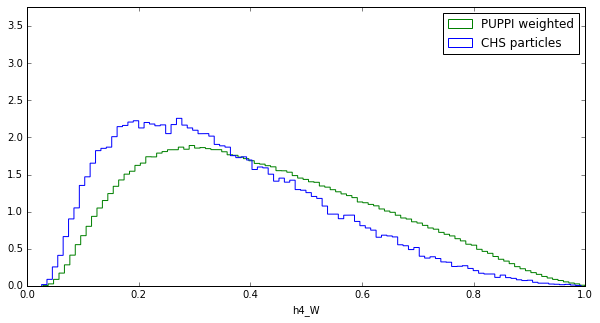

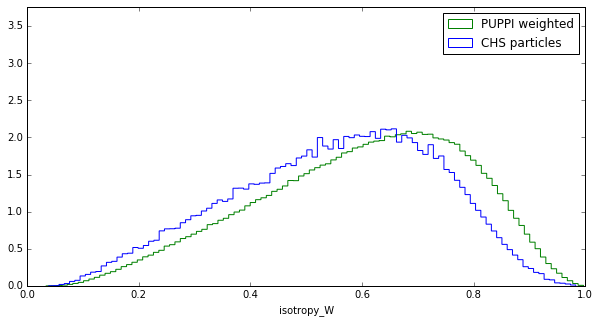

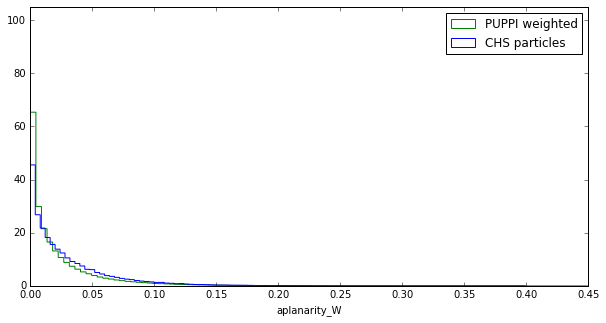

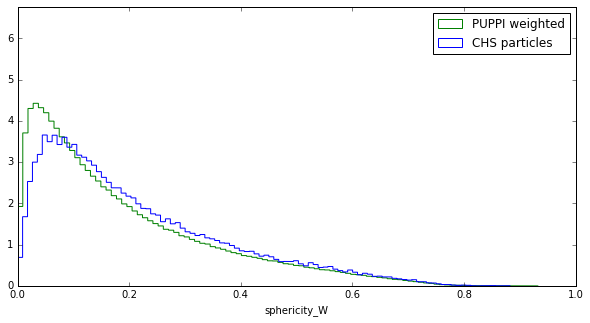

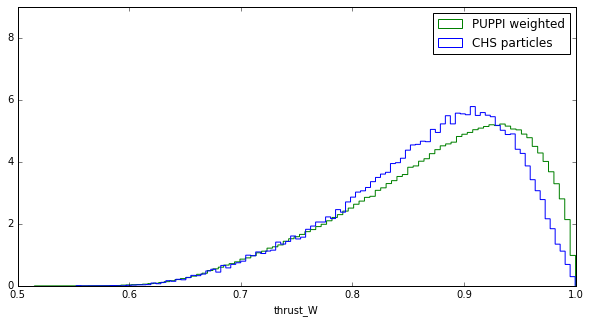

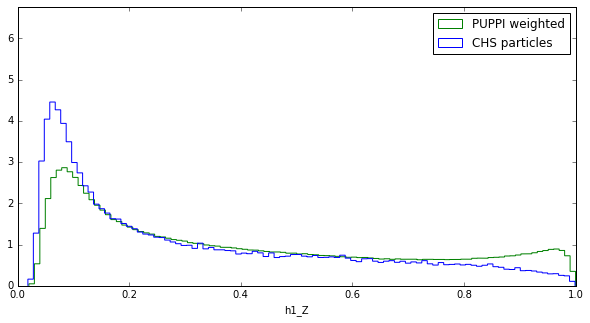

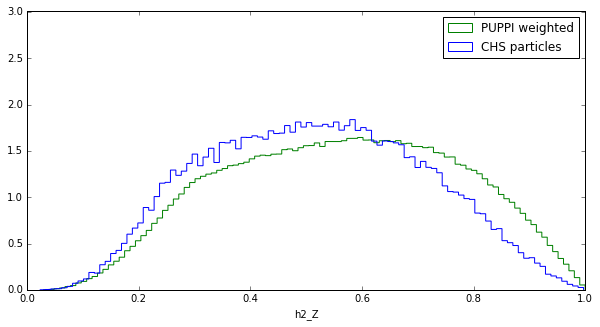

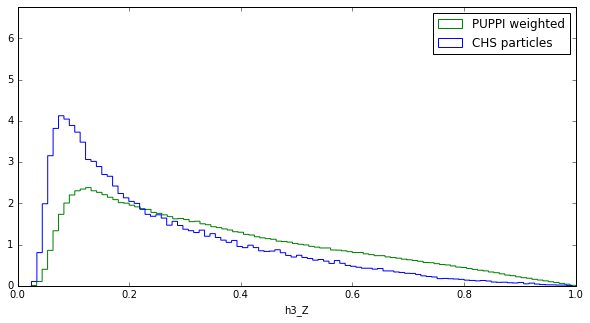

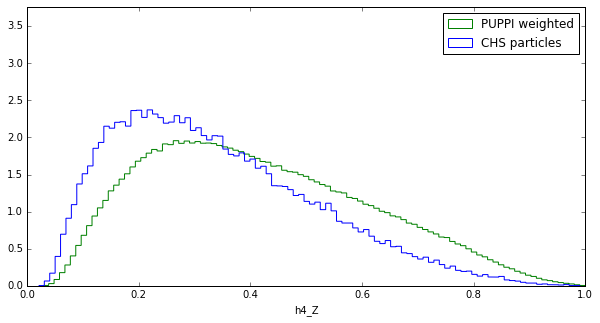

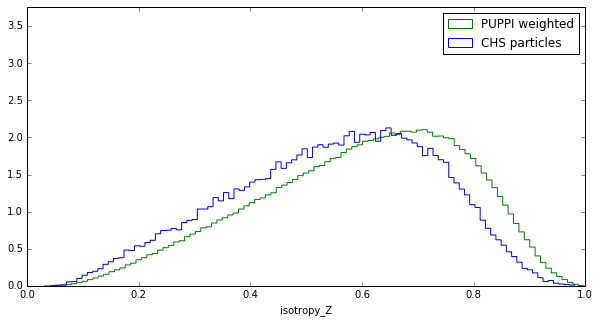

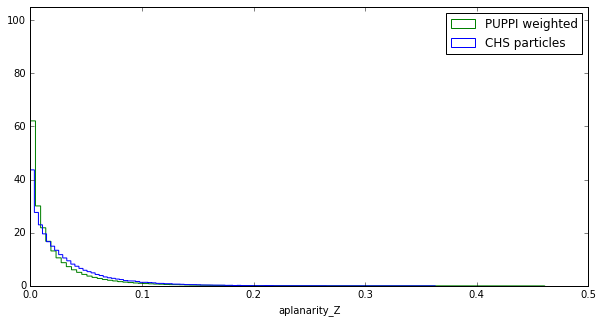

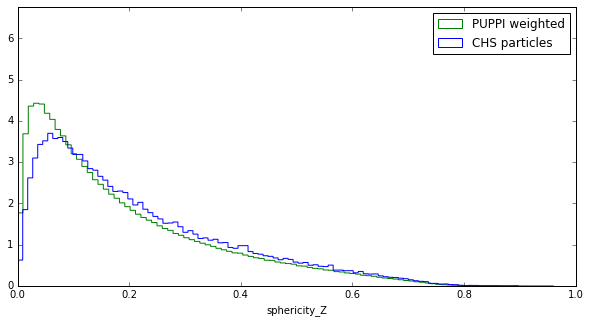

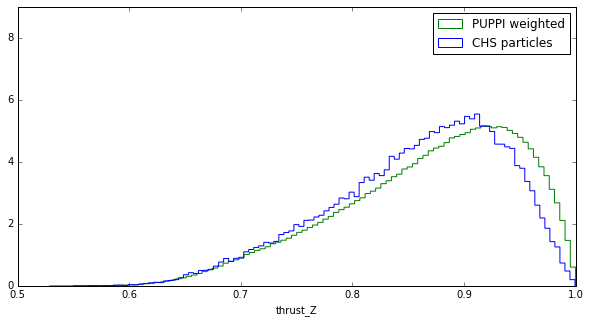

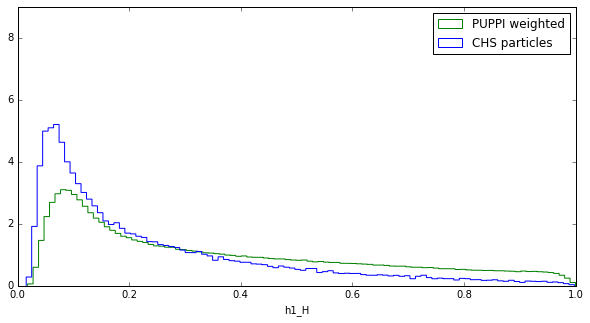

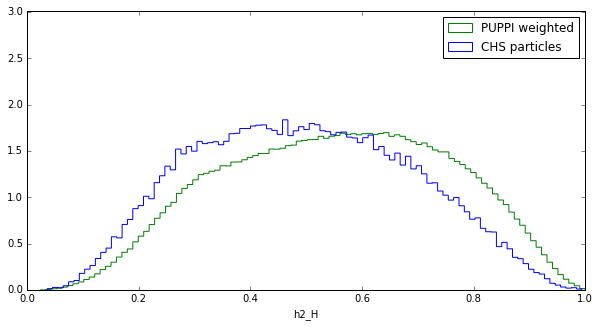

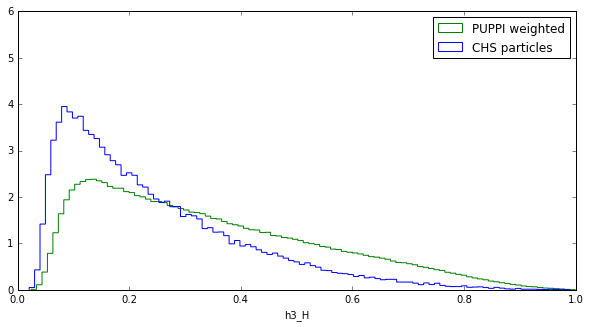

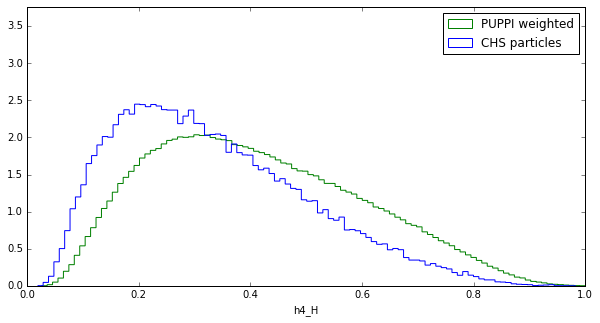

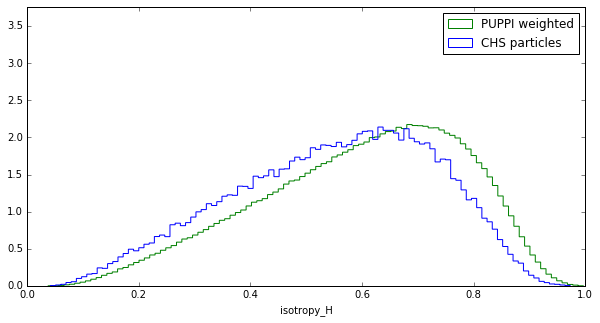

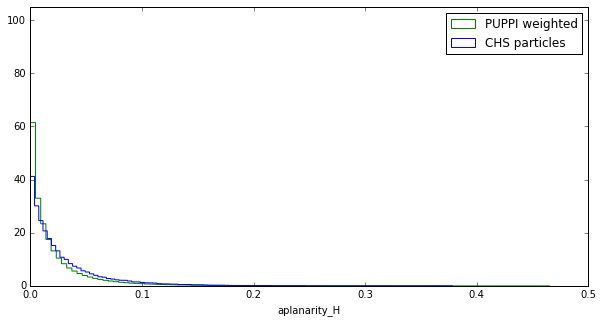

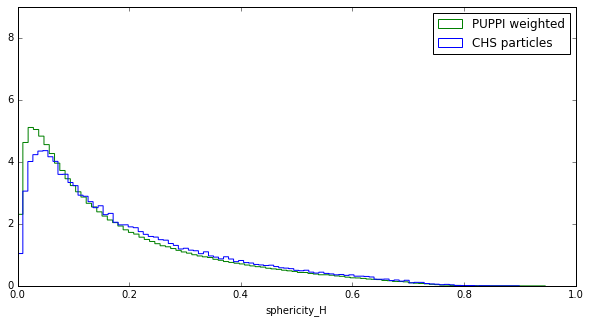

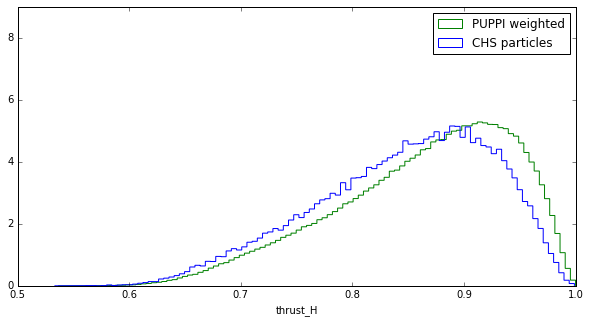

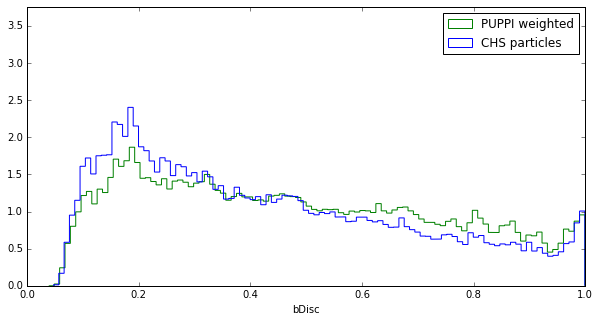

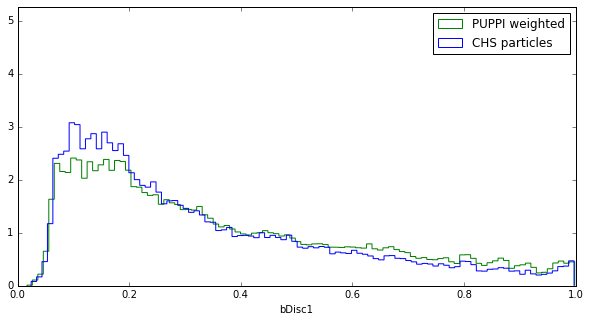

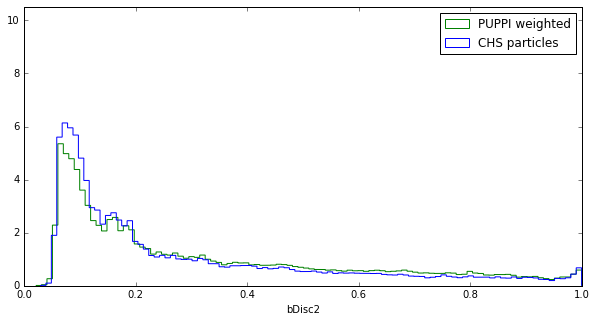

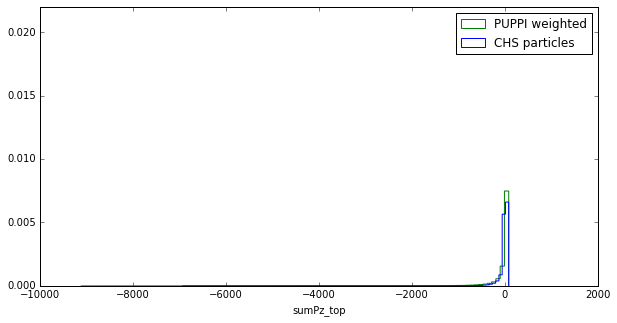

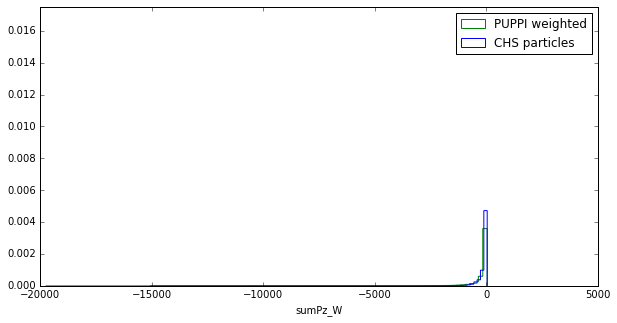

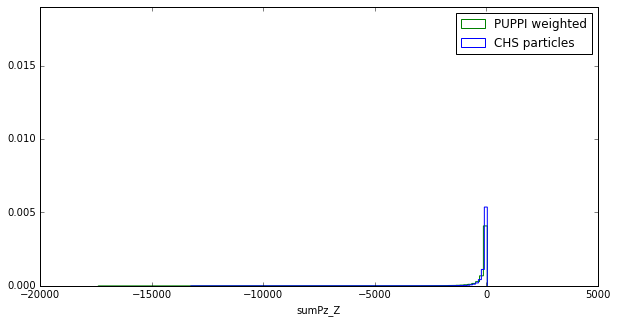

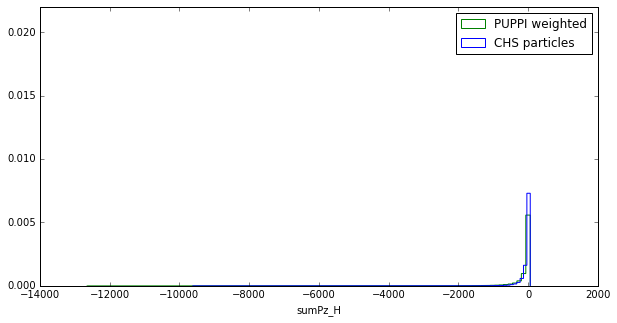

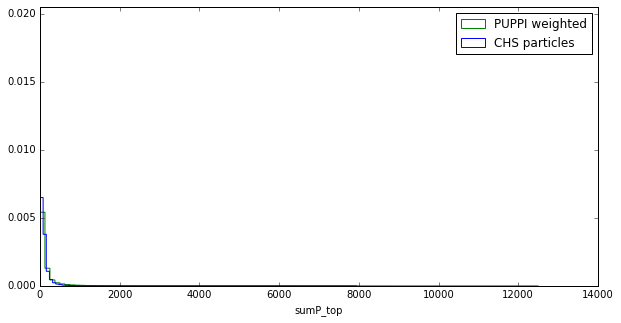

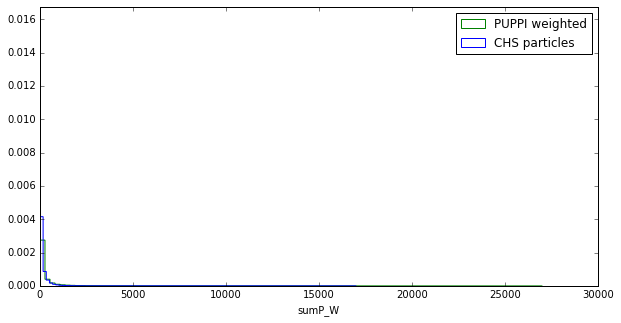

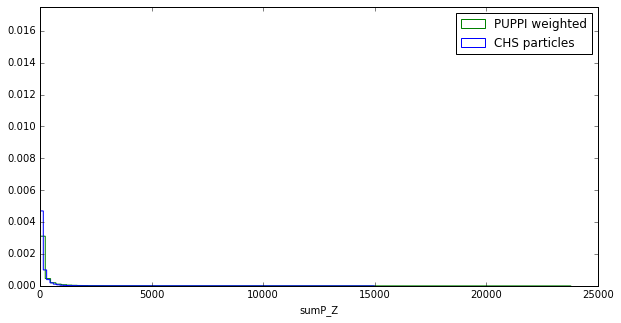

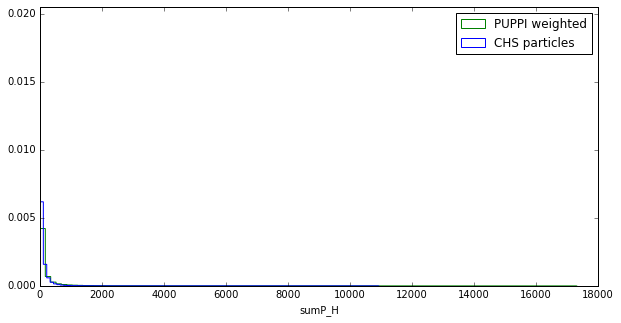

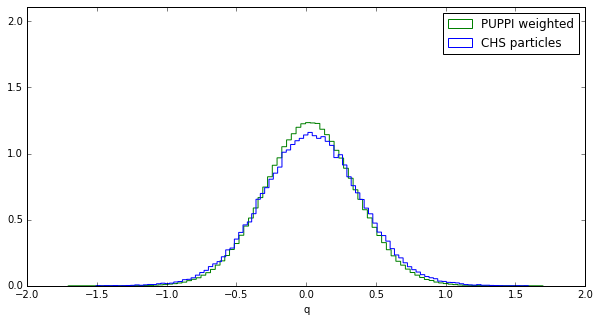

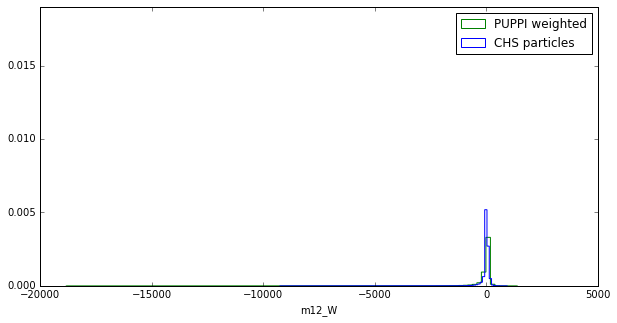

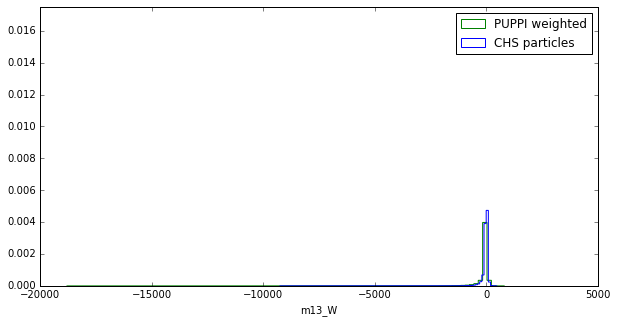

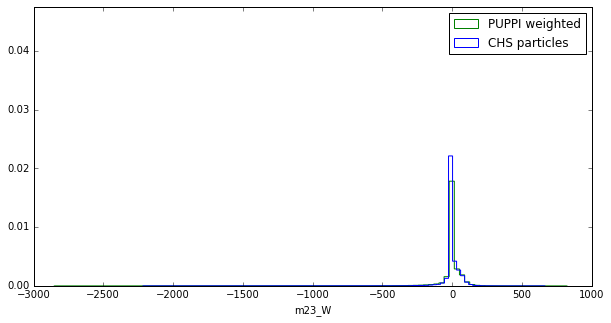

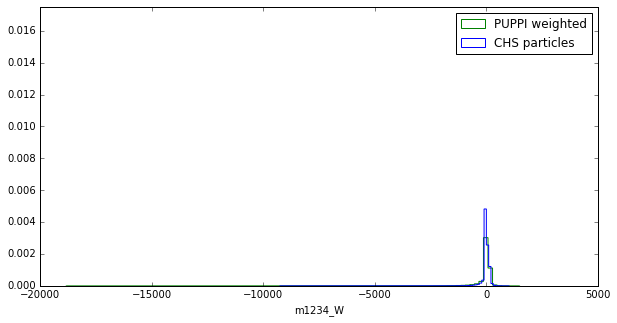

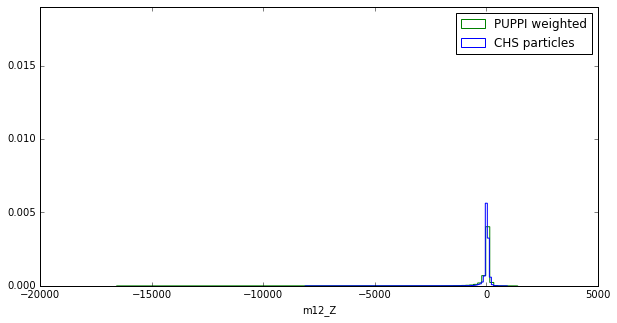

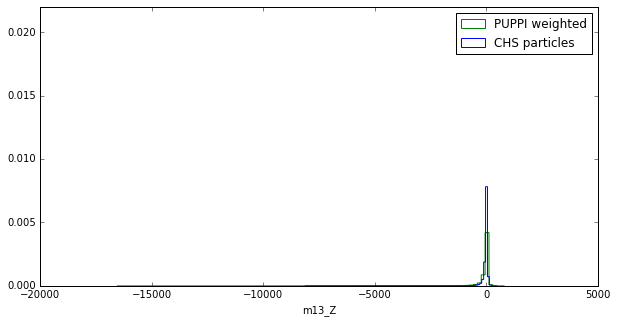

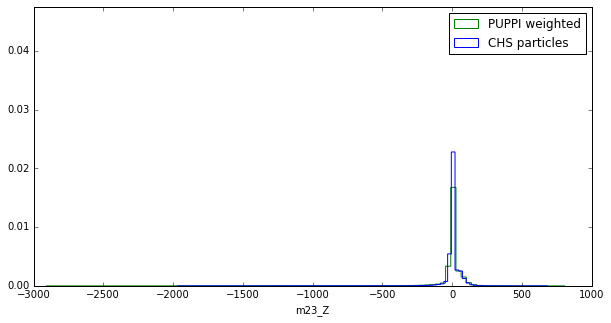

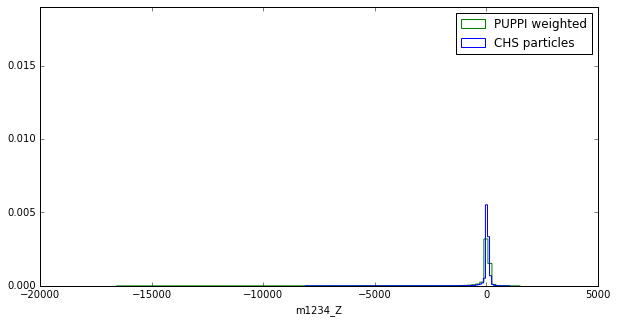

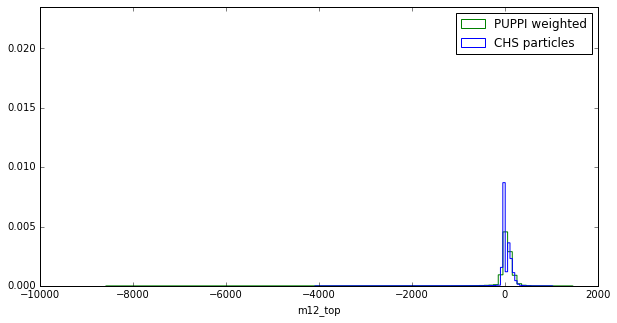

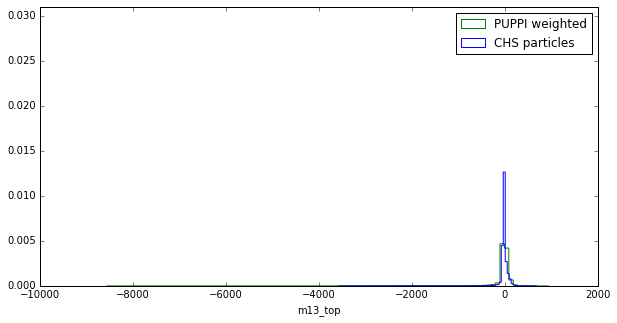

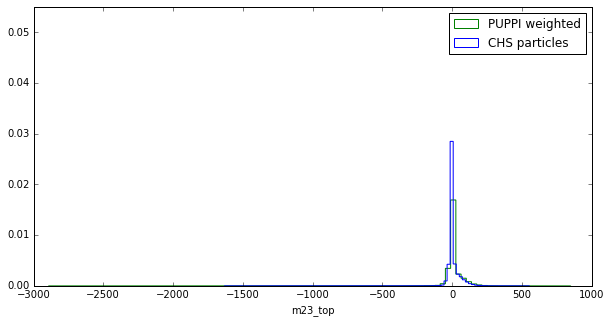

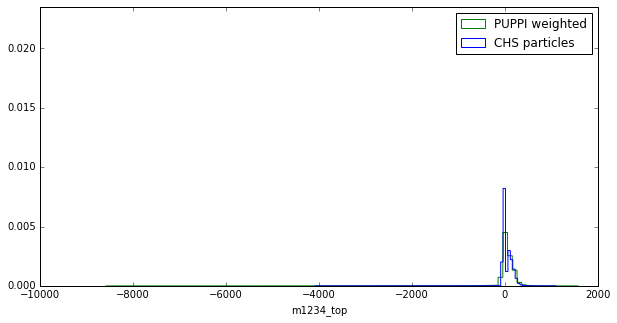

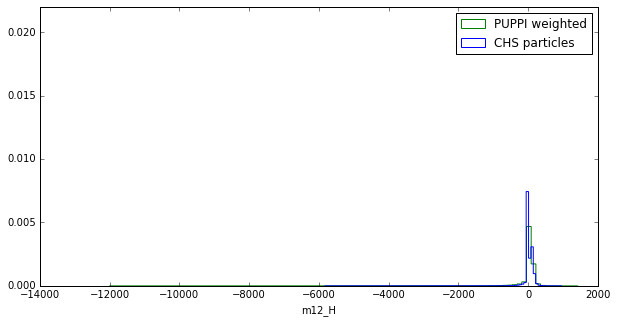

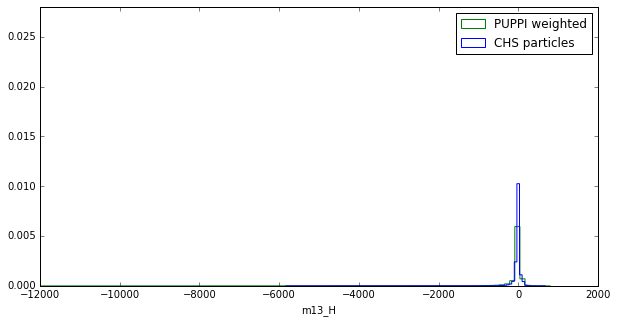

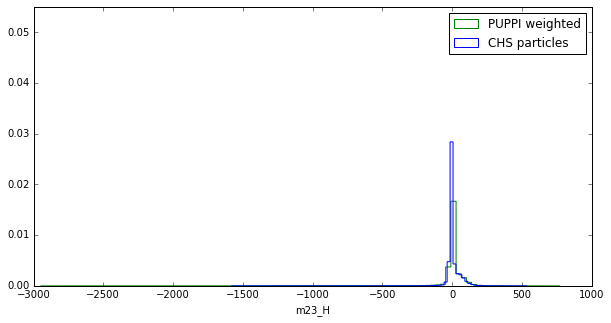

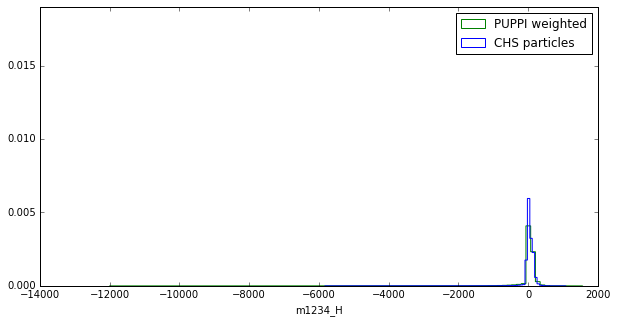

In [13]:
for index, hist in enumerate(histsTT_PUPPI):
    plt.figure(figsize=(10,5))
    plt.hist(hist, bins=100, color='g', label='PUPPI weighted', histtype='step', normed=True)
    plt.hist(histsTT_noPUPPI[index], bins=100, color='b', label='CHS particles', histtype='step', normed=True)
    plt.xlabel(vars[index])
    plt.legend()
    axes = plt.gca()
    ylims = axes.get_ylim()
    plt.ylim(0.0,ylims[1]*1.5+0.01)
    plt.show()
    plt.close()